# <u>Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning</U>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Use 'plt' as the alias for matplotlib.pyplot
%matplotlib inline
import seaborn as sns

from warnings import simplefilter  # Use 'simplefilter' for filtering warnings
simplefilter('ignore')  # Correct function name to 'simplefilter'

In [37]:
## Data Collection
df=pd.read_csv(r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\Stock-Price-Prediction-And-Forecasting-Using-Stacked-LSTM--Deep-Learning\AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [39]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [49]:
## Using 'close' for forecasting stock price
df1=df.reset_index()['close']

In [52]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [56]:
df1[1000:]

1000    190.08
1001    189.00
1002    183.09
1003    186.60
1004    182.78
         ...  
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, Length: 258, dtype: float64

<Axes: ylabel='close'>

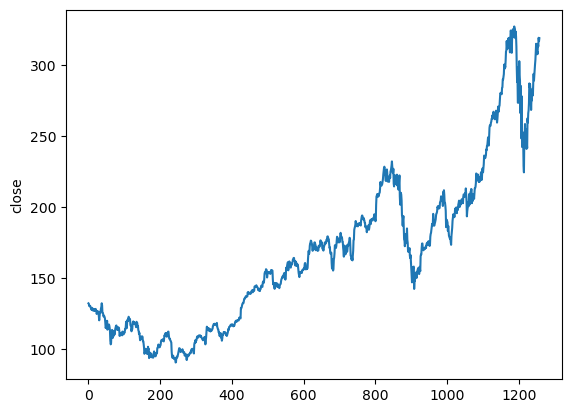

In [62]:
# Plooting graph 
sns.lineplot(df1)

- LSTM are sensitive to the scale of the data. so we apply MinMax scaler.

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [69]:
df1.shape

(1258, 1)

In [71]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])